# Matemática para Ciencia de los Datos
# Trabajo Práctico 5

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo de Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: 19 de noviembre de 2024, a más tardar a las 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante:
1. **Jonathan Chavarria**



---

**Pregunta 1 (30 puntos)**

Para la siguiente función:


$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$



Realice lo siguiente:

En python, genere un gráfico, puede usar la función meshgrid (Use la biblioteca plotly).








In [4]:
import numpy as np
import plotly.graph_objects

# Definir la función f2
def f2(x1, x2):
    return x1 * np.exp(-x1**2 - x2**2)

# Crear un rango de valores para x1 y x2
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calcular los valores de la función
Z = f2(X1, X2)

# Crear el gráfico 3D con Plotly
fig = plotly.graph_objects.Figure(data=[plotly.graph_objects.Surface(z=Z, x=X1, y=X2)])

# Configurar el diseño del gráfico
fig.update_layout(
    title="Gráfico de f2(x1, x2)",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="f2(x1, x2)"
    ),
)

# Mostrar el gráfico
fig.show()

---

**Pregunta 2 (20 puntos)**

Para la siguiente función multivariable: $z=f\left(x,y\right)=3x^{2}+2y^{4}$, calcule el vector gradiente manualmente.  Evalúelo para el punto $P_{1}=\left(7.4,-6.3\right)$. Luego calcule la magnitud (norma Euclidiana) del vector gradiente para el punto. Finalmente normalice el vector resultante.

--No se require programación en python--.

$\textrm{ El gradiente de } 𝑓(𝑥,𝑦) \textrm{denotado como } ∇𝑓(𝑥,𝑦) \textrm{es un vector compuesto por las derivadas parciales de } 𝑓 \\$

∇f(x,y)=( ∂x∂f​ , ∂y∂f )
$\textrm{Derivada parcial respecto a x: } ∂𝑓/∂𝑥 = (2*3𝑥^(2-1)+0) = 6x \\$
$\textrm{Derivada parcial respecto a y: }∂𝑓/∂𝑦 = (0+4*2𝑦^(4-1)) = 8y^3 \\$
 
$\textrm{El vector gradiente resultante es: } \\$

$∇𝑓(𝑥,𝑦)=(6𝑥,8𝑦^{3}) \\$

$\textrm{Evaluado en el punto } ∇𝑓(7.4,-6.3) = (44.4 , -2000.376) \\$

$\textrm{Norma euclidiana para el punto dado:  } \sqrt{44.4^{2} + (-2000.376)^{2}} = 2,000.869 \\$

$\textrm{El vector normalizado es el vector dividido entre la magnitud: } ||𝑓(P_{1})|| = \frac{44.4 , -2000.376}{2,000.869}  = (0.0222 ,0.9998) \\$

---

**Pregunta 3 (20 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$.

$f(x,y) = x^3+y^2$  

    * Además, evalúe en
$\begin{bmatrix}1\\1\end{bmatrix}$.






$\textrm{Derivada parcial respecto a } 𝑥 \\$
$\frac{∂f}{∂x} = (3*x^{3-1} + 0) = 3x^2 \\$
$\textrm{Derivada parcial respecto a } y \\$
$\frac{∂f}{∂y} = (0 + 2*y^(2-1)) = 2y \\$

$\textrm{Evaluando en los puntos : } (1 , 1) \\$
$ f(1, 1) = 3*1^2+2*1 = 3+2 = 5 $  





---

**Pregunta 4 (30 puntos)**

La ténica del SVD puede ser utiliada para la compresión de imágenes. Por ejemplo, una imagen **[1]** de $m×n$ pixels en escala de grises puede ser representada como una matriz $A \in R^{m×n}$ cuyos elementos $a_{ij}$ representan la intensidad del pixel $(i, j)$. En particular, una imagen contiene mucha información redundante, es decir, que puede ser eliminada sin que el efecto visual sea notable.

Se podría sustituir la matriz $A$ por otra matriz $B$ de rango menor.

Consideremos:

Teorema: Sean $\sigma_{1} \geq \sigma_{2} \geq \cdots \geq \sigma_{r} > 0 $, valores singulares no  nulos de $A \in C^{m×n}$. Entonces para cada $k < r$, la distancia desde $A$ al conjunto de matrices de rango $k$ en la norma $\left\Vert \cdot \right\Vert _{2} $ es:

$$\sigma_{k+1} = \min\limits_{rank(B)=k} \left\Vert A - B \right\Vert _{2}$$

Por tanto, si $A = UDV^T $ es la descomposición en valores singulares de $A$, la matriz de rango $k$ de mejor aproximación a $A$ es:

$$B = U
\begin{bmatrix} D  &  0      \\
                0  &  0
\end{bmatrix} V^T , D = diag(\sigma_1, \sigma_2, \cdots , \sigma_k)$$

Si $U_k$ y $V_k$ son las matrices compuestas por las primeras $k$ columnas de $U$ y $V$,  respectivamente, entonces se puede decir que (fórmula **f_1**):

$$B = U_k D V_{k}^{T}$$

logrando codificar la imagen aproximada por medio de matrices de menor tamaño.

Por otra parte, las imágenes en color **[2]** se representan en Python como matrices numéricas tridimensionales, la tercera dimensión para representar los valores de color (rojo, verde azul). Sin embargo, el método SVD es aplicable a matrices bidimensionales. Así que tenemos que encontrar una manera de convertir la matriz tridimensional en matrices bidimensionales, aplicar SVD y reconstruirla como una matriz  tridimensional. Hay dos maneras de hacerlo. Mostraremos ambos métodos a continuación.
1. método de remodelación: Este método implica aplanar la tercera dimensión de la matriz de imágenes en la segunda dimensión utilizando el método de reshape.
1. Método de capa:   Este método trata una imagen en color como una pila de 3 imágenes bidimensionales separadas (capas roja, azul y verde). Se aplica la reconstrucción SVD truncada en cada capa bidimensional por separado y luego se vuelven a juntar las capas reconstruidas.

Investigue uno de estos métodos y aplique un procedimiento similar al del cuaderno visto en clase, utilizando la figura adjunta "Imagen1.jpg" (**procesando la imagen a color, NO en escala de grises**).


1. Cargue la imagen adjunta, "Perrita.jpg".
1. Muestre su contenido en pantalla.
1. Calcule la descomposicíón en valores singulares.
1. Sea $k$ los primeros $k_{ésimos}$ primeros valores singulares. Para $k \in [5, 10, 50, 100, 300, 700, 900]$, haga:
    1. Trunque las matrices U, D y V dejando sólo aquellas columnas que corresponden a los valores singulares seleccionados ($k$), obteniendo las matrices $U_k$, $D$ y $V_k$.
    1. Muestre el tamaño de cada una de las matrices.
    1. Calcule la matriz $B$ que aproxima a $A$ segúnn la fórmula **f_1** (ver arriba).
    1. Muestre la imagen correspondiente al contenido de la matriz $B$.
    
**[1]** Texto base: https://w3.ual.es/~andrei/Practicas/practica14.pdf

**[2]** Texto base de Ramesh Putalapattu.

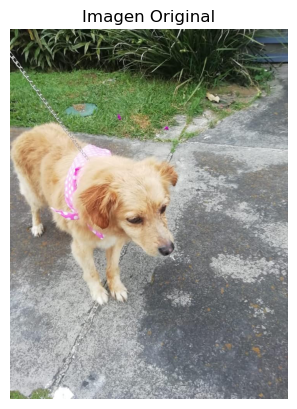

Forma de U: (2880, 720)
Forma de S (valores singulares): (720,)
Forma de Vt: (720, 720)

Para k = 5:
Tamaño de U_k: (2880, 5)
Tamaño de S_k (diagonal): (5, 5)
Tamaño de Vt_k: (5, 720)
Forma de R: (960, 720)
Forma de G: (960, 720)
Forma de B: (960, 720)


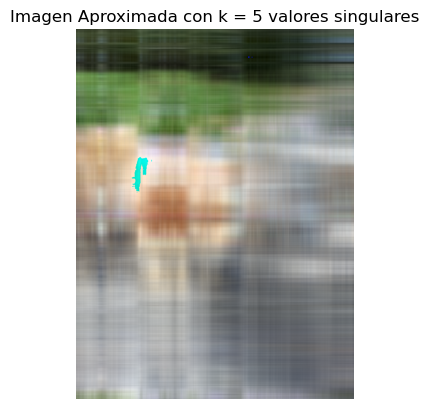


Para k = 10:
Tamaño de U_k: (2880, 10)
Tamaño de S_k (diagonal): (10, 10)
Tamaño de Vt_k: (10, 720)
Forma de R: (960, 720)
Forma de G: (960, 720)
Forma de B: (960, 720)


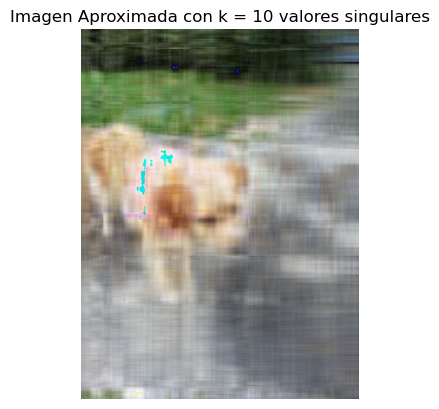


Para k = 50:
Tamaño de U_k: (2880, 50)
Tamaño de S_k (diagonal): (50, 50)
Tamaño de Vt_k: (50, 720)
Forma de R: (960, 720)
Forma de G: (960, 720)
Forma de B: (960, 720)


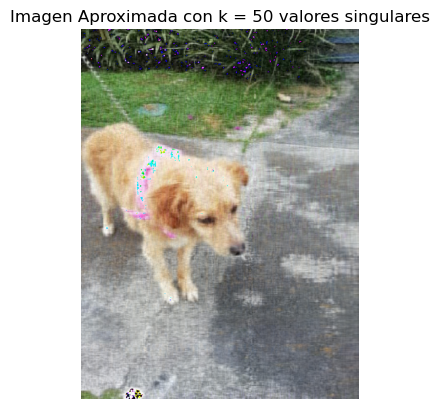


Para k = 100:
Tamaño de U_k: (2880, 100)
Tamaño de S_k (diagonal): (100, 100)
Tamaño de Vt_k: (100, 720)
Forma de R: (960, 720)
Forma de G: (960, 720)
Forma de B: (960, 720)


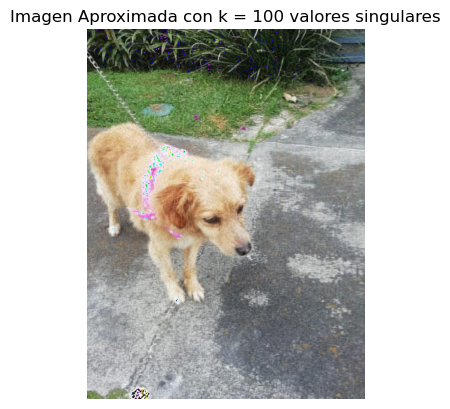


Para k = 300:
Tamaño de U_k: (2880, 300)
Tamaño de S_k (diagonal): (300, 300)
Tamaño de Vt_k: (300, 720)
Forma de R: (960, 720)
Forma de G: (960, 720)
Forma de B: (960, 720)


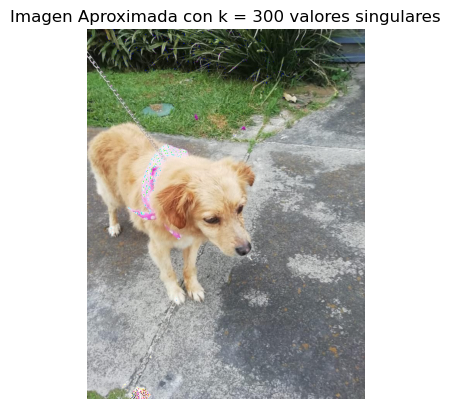


Para k = 700:
Tamaño de U_k: (2880, 700)
Tamaño de S_k (diagonal): (700, 700)
Tamaño de Vt_k: (700, 720)
Forma de R: (960, 720)
Forma de G: (960, 720)
Forma de B: (960, 720)


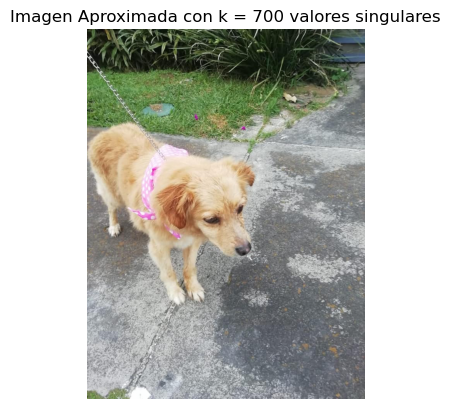


Para k = 900:
Tamaño de U_k: (2880, 720)
Tamaño de S_k (diagonal): (720, 720)
Tamaño de Vt_k: (720, 720)
Forma de R: (960, 720)
Forma de G: (960, 720)
Forma de B: (960, 720)


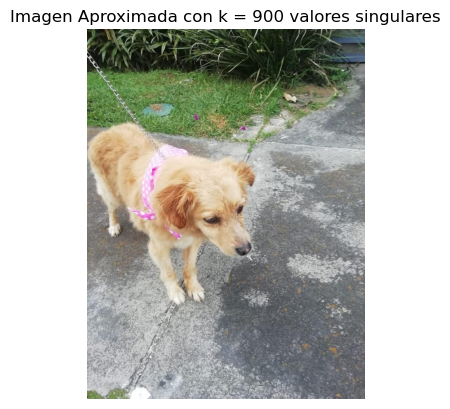

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1.0: Cargar la imagen "Perrita.jpg"
image = Image.open("Perrita.jpg")
image_array = np.array(image)

# 2.0: Mostrar la imagen original
plt.imshow(image_array)
plt.title("Imagen Original")
plt.axis('off')  # Ocultar los ejes
plt.show()

#3.0: Calcule la descomposicion en valores singulares. Primero hacemos la imagen en una sola matriz de 3nxm compuesto por los componentes RGB.
R = image_array[:, :, 0]  # Canal rojo
G = image_array[:, :, 1]  # Canal verde
B = image_array[:, :, 2]  # Canal azul

# Apilar las matrices verticalmente
matriz_combinada = np.vstack([R, G, B]) 

# Realizar la descomposición en valores singulares (SVD) de la nueva matriz
U, S, Vt = np.linalg.svd(matriz_combinada, full_matrices=False)

# Mostrar las formas de las matrices
print(f"Forma de U: {U.shape}")
print(f"Forma de S (valores singulares): {S.shape}")
print(f"Forma de Vt: {Vt.shape}")

# 3. Procesar para diferentes valores de k y mostrar resultados

k_values = [5, 10, 50, 100, 300, 700, 900]

for k in k_values:
    # Truncar las matrices U, D (diagonal) y Vt para obtener los primeros k valores singulares
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    
    # Mostrar el tamaño de las matrices truncadas
    print(f"\nPara k = {k}:")
    print(f"Tamaño de U_k: {U_k.shape}")
    print(f"Tamaño de S_k (diagonal): {S_k.shape}")
    print(f"Tamaño de Vt_k: {Vt_k.shape}")
    
    # Calcular la matriz B que aproxima a A usando la fórmula de la descomposición SVD truncada
    B = np.dot(U_k, np.dot(S_k, Vt_k))
    
    # Separar la matriz combinada de nuevo en R, G, B
    R_split, G_split, B_split = np.split(B, 3)

    print("Forma de R:", R_split.shape)
    print("Forma de G:", G_split.shape)
    print("Forma de B:", B_split.shape)

    imagen_reconstruida = np.stack([R_split, G_split, B_split], axis=-1)

    # Mostrar la imagen correspondiente a la matriz B
    plt.imshow(imagen_reconstruida.astype('uint8'))
    plt.title(f"Imagen Aproximada con k = {k} valores singulares")
    plt.axis('off')  # Ocultar los ejes
    plt.show()

